# Predictive Analysis

**Importing necessary libraries and algorithms**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supress warnings
import warnings
warnings.filterwarnings("ignore")

# import a variety of classification algorithm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis , QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier

# import a variety of Regression algorithm
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV, ElasticNet, LogisticRegression
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor 
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

# Modelling Helpers 
from sklearn.preprocessing import  Normalizer , scale
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score, ShuffleSplit, cross_validate

# Preprocessing 
from sklearn.preprocessing import MinMaxScaler , StandardScaler, LabelEncoder

#metrics are imported for evaluating regression 
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 
#metrics are imported for classification models
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, classification_report

print("All items Locked and Loaded!")

All items Locked and Loaded!


**Reading datasets**

In [ ]:
import pandas as pd

# Try the correct file path with extension
file_path = r"C:\Users\kusha\OneDrive\Desktop\Python\Projects\Prediction Of Austism\Model_2\Datasets.csv"
df = pd.read_csv(file_path)
print("Dataset loaded!")


Dataset loaded!


In [5]:
df

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,1050,0,0,0,0,0,0,0,0,0,1,24,1,f,White European,no,yes,family member,No
1050,1051,0,0,1,1,1,0,1,0,1,0,12,5,m,black,yes,no,family member,Yes
1051,1052,1,0,1,1,1,1,1,1,1,1,18,9,m,middle eastern,yes,no,family member,Yes
1052,1053,1,0,0,0,0,0,0,1,0,1,19,3,m,White European,no,yes,family member,No


**dropping who completed the test columns**

In [6]:
print(df)

      Case_No  A1  A2  A3  A4  A5  A6  A7  A8  A9  A10  Age_Mons  \
0           1   0   0   0   0   0   0   1   1   0    1        28   
1           2   1   1   0   0   0   1   1   0   0    0        36   
2           3   1   0   0   0   0   0   1   1   0    1        36   
3           4   1   1   1   1   1   1   1   1   1    1        24   
4           5   1   1   0   1   1   1   1   1   1    1        20   
...       ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...       ...   
1049     1050   0   0   0   0   0   0   0   0   0    1        24   
1050     1051   0   0   1   1   1   0   1   0   1    0        12   
1051     1052   1   0   1   1   1   1   1   1   1    1        18   
1052     1053   1   0   0   0   0   0   0   1   0    1        19   
1053     1054   1   1   0   0   1   1   0   1   1    0        24   

      Qchat-10-Score Sex       Ethnicity Jaundice Family_mem_with_ASD  \
0                  3   f  middle eastern      yes                  no   
1                  4   m  White Europ

In [7]:
df = df.drop(['Case_No'], axis = 1)
df.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons',
       'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice', 'Family_mem_with_ASD',
       'Who completed the test', 'Class/ASD Traits '],
      dtype='object')

**Visualizing the answered questions**

In [8]:
df

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,0,0,0,0,0,0,0,0,0,1,24,1,f,White European,no,yes,family member,No
1050,0,0,1,1,1,0,1,0,1,0,12,5,m,black,yes,no,family member,Yes
1051,1,0,1,1,1,1,1,1,1,1,18,9,m,middle eastern,yes,no,family member,Yes
1052,1,0,0,0,0,0,0,1,0,1,19,3,m,White European,no,yes,family member,No


In [9]:
le = LabelEncoder()
columns = ['Ethnicity', 'Family_mem_with_ASD', 'Class/ASD Traits ', 'Sex', 'Jaundice','Who completed the test']
for col in columns:
    df[col] = le.fit_transform(df[col])
df.dtypes

A1                        int64
A2                        int64
A3                        int64
A4                        int64
A5                        int64
A6                        int64
A7                        int64
A8                        int64
A9                        int64
A10                       int64
Age_Mons                  int64
Qchat-10-Score            int64
Sex                       int32
Ethnicity                 int32
Jaundice                  int32
Family_mem_with_ASD       int32
Who completed the test    int32
Class/ASD Traits          int32
dtype: object

<Axes: >

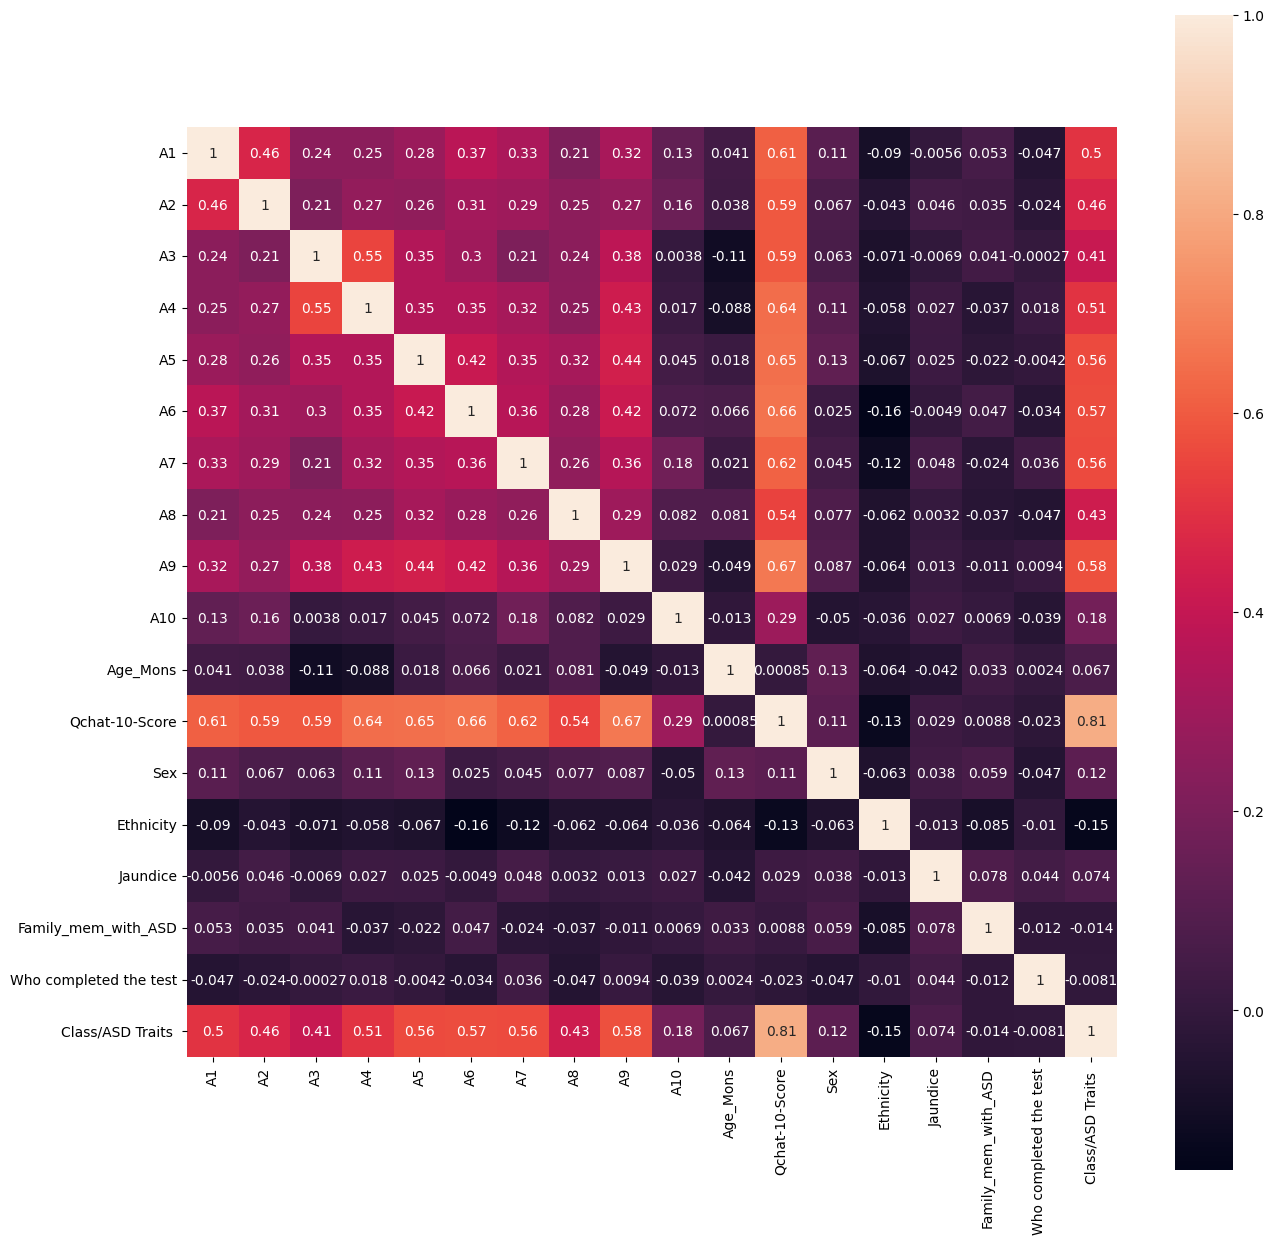

In [10]:
corr = df.corr()
plt.figure(figsize = (15,15))
sns.heatmap(data = corr, annot = True, square = True, cbar = True)

<Axes: xlabel='Qchat-10-Score', ylabel='count'>

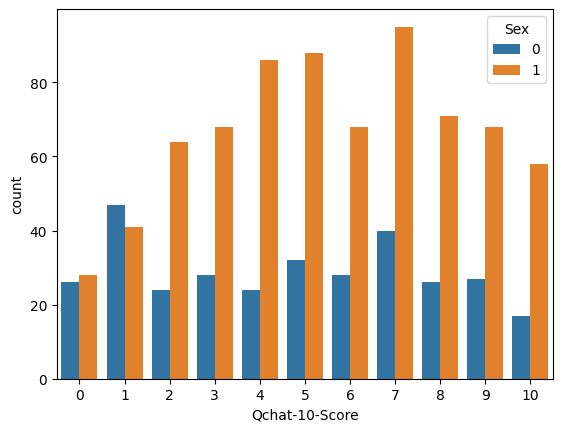

In [11]:
sns.countplot(x = 'Qchat-10-Score', hue = 'Sex', data = df)

In [12]:
df.drop('Qchat-10-Score', axis = 1, inplace = True)

In [13]:
df

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,0,0,0,0,0,0,1,1,0,1,28,0,8,1,0,3,0
1,1,1,0,0,0,1,1,0,0,0,36,1,5,1,0,3,1
2,1,0,0,0,0,0,1,1,0,1,36,1,8,1,0,3,1
3,1,1,1,1,1,1,1,1,1,1,24,1,0,0,0,3,1
4,1,1,0,1,1,1,1,1,1,1,20,0,5,0,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,0,0,0,0,0,0,0,0,0,1,24,0,5,0,1,3,0
1050,0,0,1,1,1,0,1,0,1,0,12,1,7,1,0,3,1
1051,1,0,1,1,1,1,1,1,1,1,18,1,8,1,0,3,1
1052,1,0,0,0,0,0,0,1,0,1,19,1,5,0,1,3,0


**converting object into integer**

**

In [14]:
df['Family_mem_with_ASD'].unique()

array([0, 1])

**train_test_split** -> function from scikit-learn to split the data into training and testing sets

In [15]:
X = df.drop(['Class/ASD Traits '], axis = 1)      # X is independent variable
Y = df['Class/ASD Traits ']                       # Y is dependent variable
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 7)

**list of classification and regression models** -> fits each model on the training data, and prints the accuracy score for each model's predictions on the test data

In [16]:
#each model is appended to the list
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RF', RandomForestRegressor()))
models.append(('XGB', XGBClassifier()))
models.append(('GBR', GradientBoostingRegressor()))
models.append(('ABR', AdaBoostRegressor()))


for name, model in models:
    model.fit(x_train, y_train)
    pred = model.predict(x_test).astype(int)
    print(name, accuracy_score(y_test, pred))

LR 1.0
LDA 0.946969696969697
KNN 0.8901515151515151
CART 0.8901515151515151
NB 0.9507575757575758
SVM 0.8446969696969697
RF 0.6742424242424242
XGB 0.9886363636363636
GBR 0.5946969696969697
ABR 0.5151515151515151


**From the above results, it can be seen that XGBoost Classifier (XGB) has the highest accuracy score of 0.989, while AdaBoost Regressor (ABR) has the lowest accuracy score of 0.443**

**grid search with cross-validation to find the best hyperparameters for a support vector machine (SVM) classifier**

In [17]:
svc = SVC()

params = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}

clf = GridSearchCV(svc, param_grid = params, scoring = 'accuracy', cv = 10, verbose = 2)

clf.fit(x_train, y_train)
clf.best_params_

Fitting 10 folds for each of 128 candidates, totalling 1280 fits
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma

{'C': 0.8, 'gamma': 0.1, 'kernel': 'linear'}

In [18]:
# Re-running model with best parametres
svc1 = SVC(C = 0.8, gamma = 0.1, kernel = 'rbf')
svc1.fit(x_train, y_train)
pred = svc1.predict(x_test)
print(accuracy_score(y_test, pred))

0.9166666666666666


In [19]:
# Re-running model with best parametres
svc1 = SVC(kernel = 'linear')
svc1.fit(x_train, y_train)
pred = svc1.predict(x_test)
print(accuracy_score(y_test, pred))

1.0


In [20]:
x_test = x_test.to_numpy()

In [21]:
x_train = x_train.to_numpy()

In [22]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
pred = gnb.predict(x_test)
print(accuracy_score(y_test, pred))

0.9507575757575758


In [23]:
x_test

array([[0, 0, 1, ..., 0, 0, 3],
       [0, 0, 0, ..., 0, 0, 3],
       [0, 0, 0, ..., 0, 0, 3],
       ...,
       [1, 1, 0, ..., 1, 0, 3],
       [0, 0, 0, ..., 0, 0, 3],
       [1, 1, 0, ..., 0, 0, 3]], dtype=int64)

In [24]:
print(pred)

[1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1 1 0 1 1 0
 1 1 0 1 0 0 1 1 1 1 0 0 0 1 1 0 0 0 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 0
 1 1 1 0 1 0 1 1 0 1 0 0 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1
 0 0 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1
 1 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1 1
 0 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 0 0 0 1 1 0 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1
 1 0 1 0 1]


In [25]:
print(y_test)

650    1
34     0
54     0
656    1
874    1
      ..
982    1
838    0
324    1
972    0
347    1
Name: Class/ASD Traits , Length: 264, dtype: int32


In [ ]:
import pickle
with open(r'C:\Users\kusha\OneDrive\Desktop\Python\Projects\Prediction Of Austism\Model_2\nbmodel1.pkl','wb') as model_file:
    pickle.dump(gnb,model_file)

In [28]:
x_train

array([[0, 1, 1, ..., 1, 0, 3],
       [1, 1, 1, ..., 0, 0, 3],
       [0, 0, 0, ..., 0, 0, 3],
       ...,
       [0, 1, 1, ..., 0, 1, 3],
       [1, 1, 0, ..., 0, 0, 3],
       [1, 0, 0, ..., 0, 1, 3]], dtype=int64)

In [29]:
type(x_test)

numpy.ndarray

In [30]:
df["Who completed the test"].unique()

array([3, 0, 2, 1])

In [31]:
df["Ethnicity"].unique()

array([ 8,  5,  0,  7,  6, 10,  2,  3,  1,  9,  4])